In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [50]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [51]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [52]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [54]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [55]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [56]:
data.shape

(5110, 12)

In [41]:
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

# Univariate Analysis

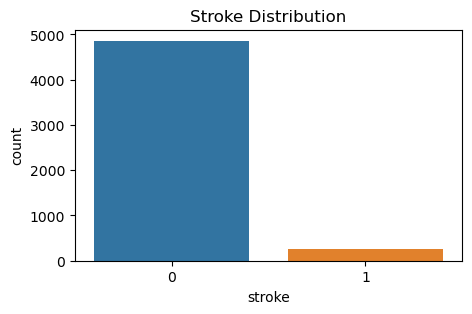

0    4861
1     249
Name: stroke, dtype: int64


In [11]:
plt.figure(figsize=(5, 3))
sns.countplot(x='stroke', data=data)
plt.title('Stroke Distribution')
plt.show()
print(data['stroke'].value_counts())

## Inference : 
---
Based on the dataset containing information for a total of 5110 individuals, it can be observed that:

A vast majority of 4861 individuals (approximately 95% of the sample) did not have a record of stroke.
On the other hand, there were 249 individuals (approximately 5% of the sample) who had a recorded history of stroke.

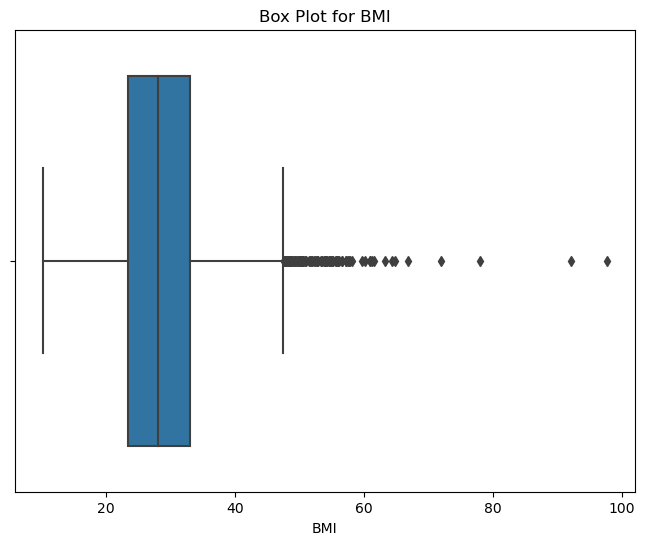

In [101]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='bmi', data=data)
plt.title('Box Plot for BMI')
plt.xlabel('BMI')
plt.show()

In [19]:
bmi_values = data['bmi']

q1 = bmi_values.quantile(0.25)
median = bmi_values.quantile(0.50)
q3 = bmi_values.quantile(0.75)

print(f"Q1 (25th percentile): {q1:.2f}")
print(f"Median (50th percentile): {median:.2f}")
print(f"Q3 (75th percentile): {q3:.2f}")

Q1 (25th percentile): 23.50
Median (50th percentile): 28.10
Q3 (75th percentile): 33.10


## Inference : 
---
The inferred information from the quartile values for the 'bmi' variable in the stroke prediction dataset is as follows:

* Q1 (25th Percentile): The 25th percentile (Q1) value for BMI is 23.50. This means that approximately 25% of the individuals in the dataset have a BMI value less than or equal to 23.50. It represents the lower end of the middle 50% of BMI values.

* Median (50th Percentile): The median value for BMI is 28.10. This value splits the data into two equal halves. About 50% of the individuals in the dataset have a BMI value less than or equal to 28.10, while the other 50% have a BMI value greater than or equal to 28.10.

* Q3 (75th Percentile): The 75th percentile (Q3) value for BMI is 33.10. This indicates that approximately 75% of the individuals in the dataset have a BMI value less than or equal to 33.10. It represents the upper end of the middle 50% of BMI values.

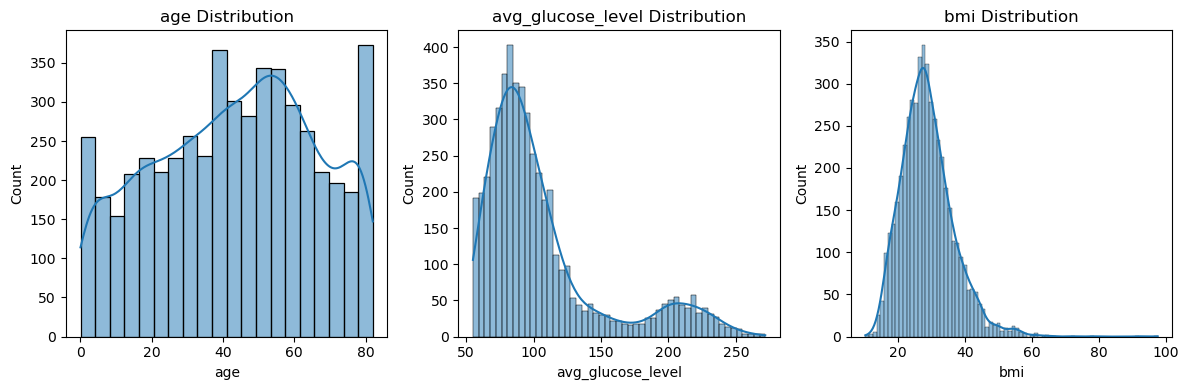

In [58]:
# For numerical variables
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

# Histogram for numerical variables
plt.figure(figsize=(12, 4))
for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()

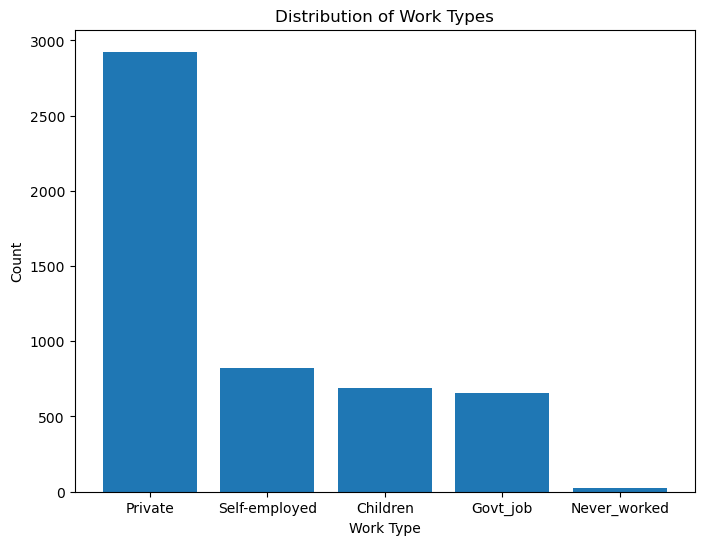

In [9]:
work_types = ['Private', 'Self-employed', 'Children', 'Govt_job', 'Never_worked']
counts = [2925, 819, 687, 657, 22]

plt.figure(figsize=(8, 6))
plt.bar(work_types, counts)
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.title('Distribution of Work Types')
plt.show()


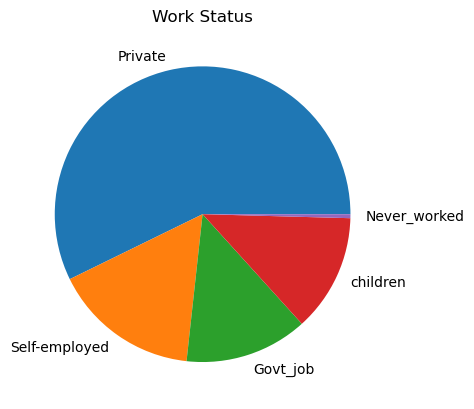

In [10]:
plt.pie(data['work_type'].value_counts(),labels=data['work_type'].unique())
plt.title('Work Status')
plt.show()

In [8]:
print(data['work_type'].value_counts())

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


## Inference : 
---
In the dataset comprising a total of 5110 individuals, the distribution of work types is as follows:

* The largest group consists of 2925 individuals (approximately 57% of the sample), who are employed in the private sector.
* The second most prevalent work type is self-employment, with 819 individuals (approximately 16% of the sample) being self-employed.
* The government sector employs 657 individuals (approximately 13% of the sample), making it the third most common work type.
* There are 687 individuals (approximately 13% of the sample) in the dataset classified as children, who are likely not part of the workforce.
* The smallest group consists of 22 individuals (less than 1% of the sample) who are unemployed.

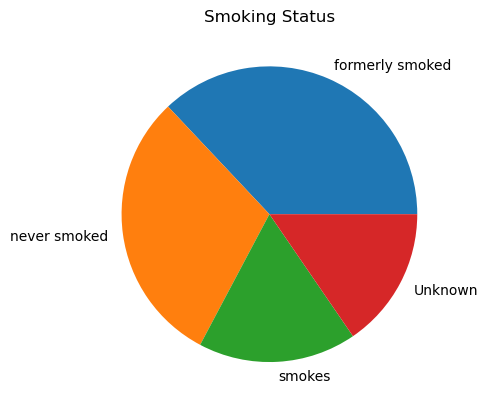

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [13]:
plt.pie(data['smoking_status'].value_counts(),labels=data['smoking_status'].unique())
plt.title('Smoking Status')
plt.show()
print(data['smoking_status'].value_counts())

## Inference : 
---
In the dataset containing information for the individuals' smoking habits, the distribution of smoking statuses is as follows:

* The largest group comprises individuals who have never smoked, with 1892 individuals (approximately 37% of the sample) falling into this category.
* The "Unknown" category accounts for 1544 individuals (approximately 30% of the sample), indicating a significant portion of missing or unspecified data regarding smoking habits.
* There are 885 individuals (approximately 17% of the sample) who were formerly smokers.
* Additionally, 789 individuals (approximately 15% of the sample) are currently identified as smokers.

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


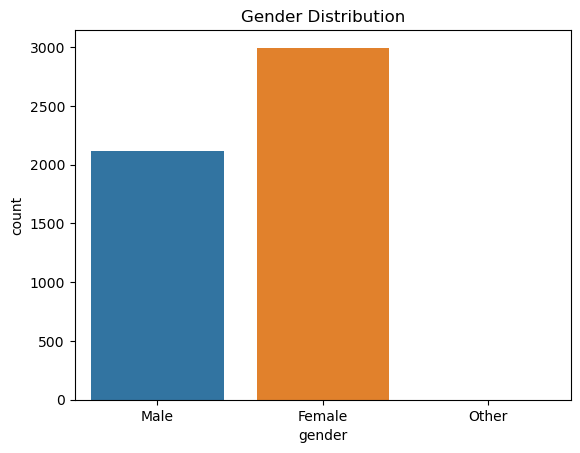

In [15]:
sns.countplot(x='gender',data=data)
plt.title("Gender Distribution")
print(data['gender'].value_counts())

## Inference : 
---
Based on the dataset, which includes information about gender among individuals, the distribution of gender is as follows:

* The largest group consists of 2994 individuals (approximately 58.5% of the sample) who identify as female.
* The second most prevalent group is composed of 2115 individuals (approximately 41.4% of the sample) who identify as male.
* There is one individual (less than 0.1% of the sample) classified as "Other."

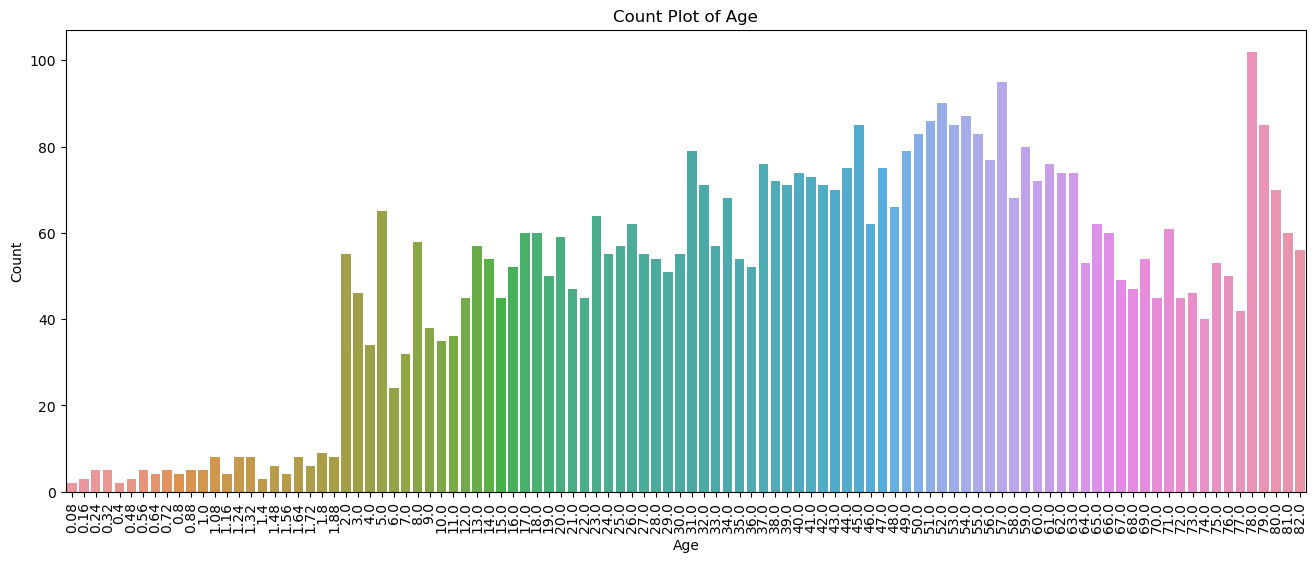

In [18]:
plt.figure(figsize=(16, 6))  
sns.countplot(x='age', data=data)
plt.xticks(rotation=90)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count Plot of Age')

plt.show()


Text(0.5, 1.0, 'Age Kde Plot System Analysis')

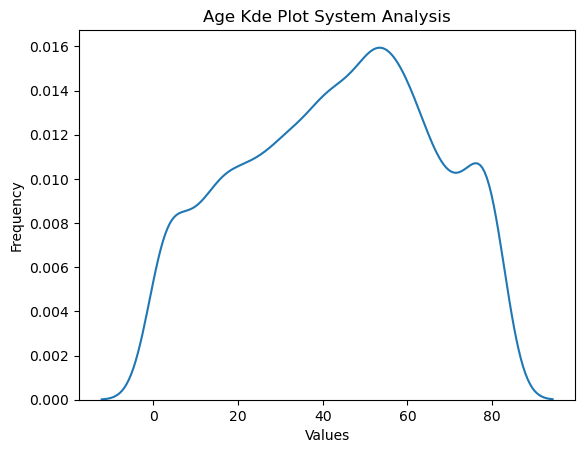

In [76]:
sns.kdeplot(data['age'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Age Kde Plot System Analysis')

# Bivariate Anaysis

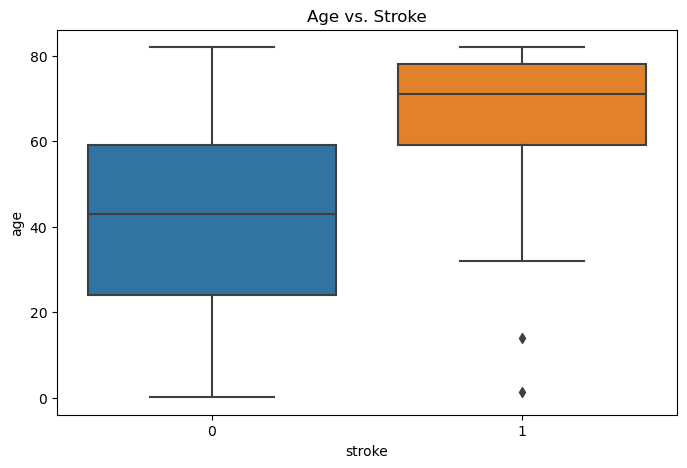

In [59]:
# Relationship between age and stroke
plt.figure(figsize=(8, 5))
sns.boxplot(x='stroke', y='age', data=data)
plt.title('Age vs. Stroke')
plt.show()

In [20]:
q1_with_stroke = data[data['stroke'] == 1]['age'].quantile(0.25)
median_with_stroke = data[data['stroke'] == 1]['age'].quantile(0.50)
q3_with_stroke = data[data['stroke'] == 1]['age'].quantile(0.75)

q1_without_stroke = data[data['stroke'] == 0]['age'].quantile(0.25)
median_without_stroke = data[data['stroke'] == 0]['age'].quantile(0.50)
q3_without_stroke = data[data['stroke'] == 0]['age'].quantile(0.75)

# Step 3: Print the results
print("Quartiles for 'age' among individuals with stroke:")
print(f"Q1 (25th percentile): {q1_with_stroke:.2f}")
print(f"Median (50th percentile): {median_with_stroke:.2f}")
print(f"Q3 (75th percentile): {q3_with_stroke:.2f}")
print()

print("Quartiles for 'age' among individuals without stroke:")
print(f"Q1 (25th percentile): {q1_without_stroke:.2f}")
print(f"Median (50th percentile): {median_without_stroke:.2f}")
print(f"Q3 (75th percentile): {q3_without_stroke:.2f}")

Quartiles for 'age' among individuals with stroke:
Q1 (25th percentile): 59.00
Median (50th percentile): 71.00
Q3 (75th percentile): 78.00

Quartiles for 'age' among individuals without stroke:
Q1 (25th percentile): 24.00
Median (50th percentile): 43.00
Q3 (75th percentile): 59.00


## Inference: 
------------
The quartile values for 'age' among individuals with and without stroke in the dataset provide valuable insights into the distribution and characteristics of age within these two groups.

For individuals with stroke:

* The first quartile (Q1) value of 59.00 suggests that approximately 25% of individuals with stroke are aged 59 years or below.
* The median (50th percentile) value of 71.00 indicates that half of the individuals with stroke fall below the age of 71 years.
* The third quartile (Q3) value of 78.00 implies that about 75% of individuals with stroke are aged 78 years or below.

For individuals without stroke:

* The first quartile (Q1) value of 24.00 suggests that approximately 25% of individuals without stroke are aged 24 years or below.
* The median (50th percentile) value of 43.00 indicates that half of the individuals without stroke are below the age of 43 years.
* The third quartile (Q3) value of 59.00 implies that about 75% of individuals without stroke are aged 59 years or below.

In summary, from observation we can interpret that individuals with stroke tend to be older, as evidenced by the higher quartile values in comparison to individuals without stroke. The interquartile range (IQR) for individuals with stroke (Q3 - Q1 = 19.00) is narrower than that of individuals without stroke (Q3 - Q1 = 35.00), indicating a more concentrated distribution of ages among those with stroke. The data further highlights the potential significance of age as a predictive factor for stroke, with older age groups potentially having a higher risk of experiencing stroke. 

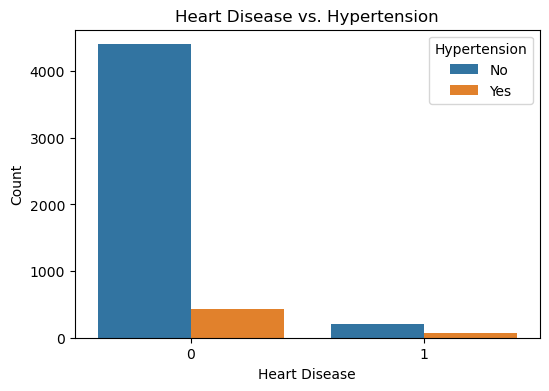

In [82]:
plt.figure(figsize=(6, 4))
sns.countplot(x='heart_disease', hue='hypertension', data=data)
plt.title('Heart Disease vs. Hypertension')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.legend(title='Hypertension', labels=['No', 'Yes'])
plt.show()

In [33]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['hypertension'], data['stroke'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Contingency Table:")
print("\n")
print(contingency_table)
print("\nChi-square value:", chi2)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("\nThere is a statistically significant relationship between hypertension and stroke.")
else:
    print("\nThere is no statistically significant relationship between hypertension and stroke.")

Contingency Table:


stroke           0    1
hypertension           
0             4429  183
1              432   66

Chi-square value: 81.6053682482931
P-value: 1.661621901511823e-19

There is a statistically significant relationship between hypertension and stroke.


## Inference:
--------
The contingency table presented above shows the frequency distribution of individuals based on the presence or absence of hypertension (hypertension = 0 for no hypertension, hypertension = 1 for hypertension) and the occurrence of stroke (stroke = 0 for no stroke, stroke = 1 for stroke).

From the contingency table, we observe that:

* Among individuals without hypertension (hypertension = 0), 4429 individuals did not experience a stroke (stroke = 0), and 183 individuals had a stroke (stroke = 1).
* Among individuals with hypertension (hypertension = 1), 432 individuals did not experience a stroke (stroke = 0), and 66 individuals had a stroke (stroke = 1).

To assess whether there is a statistically significant relationship between hypertension and stroke, we performed a chi-square test. The computed chi-square value is 81.61, and the associated p-value is 1.66e-19.

Considering a significance level (alpha) of 0.05 (commonly used in hypothesis testing), the extremely low p-value (much less than 0.05) suggests that the observed association between hypertension and stroke is not likely to be due to random chance. Therefore, we reject the null hypothesis, which assumes that there is no relationship between hypertension and stroke.

In conclusion, based on the statistical analysis, we find strong evidence to support a significant relationship between hypertension and stroke in the given dataset. Individuals with hypertension appear to have a higher likelihood of experiencing a stroke compared to those without hypertension. This finding could be essential for understanding the risk factors associated with stroke and may have implications for preventive strategies and medical interventions to mitigate stroke risk in susceptible populations.

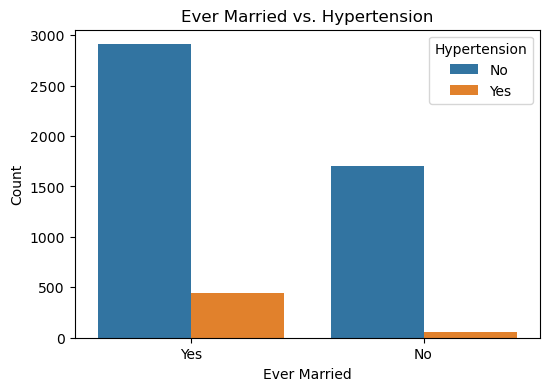

In [83]:
plt.figure(figsize=(6, 4))
sns.countplot(x='ever_married', hue='hypertension', data=data)
plt.title('Ever Married vs. Hypertension')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.legend(title='Hypertension', labels=['No', 'Yes'])
plt.show()

In [86]:
contingency_table = pd.crosstab(data['ever_married'], data['hypertension'], margins=True)
contingency_table

hypertension,0,1,All
ever_married,,,
No,1704,53,1757
Yes,2908,445,3353
All,4612,498,5110


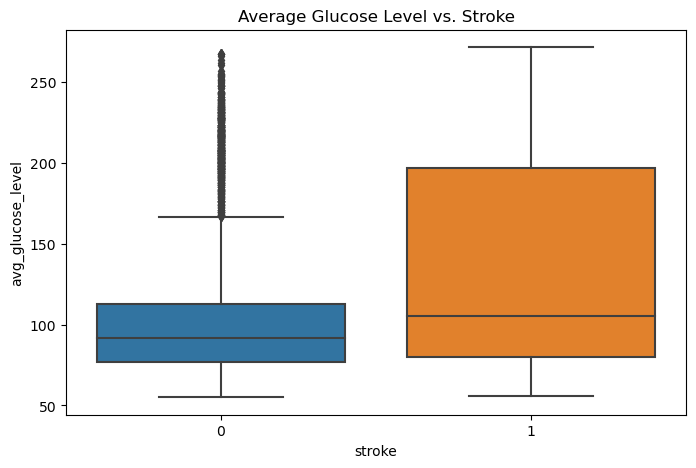

In [60]:
# Relationship between average glucose level and stroke
plt.figure(figsize=(8, 5))
sns.boxplot(x='stroke', y='avg_glucose_level', data=data)
plt.title('Average Glucose Level vs. Stroke')
plt.show()

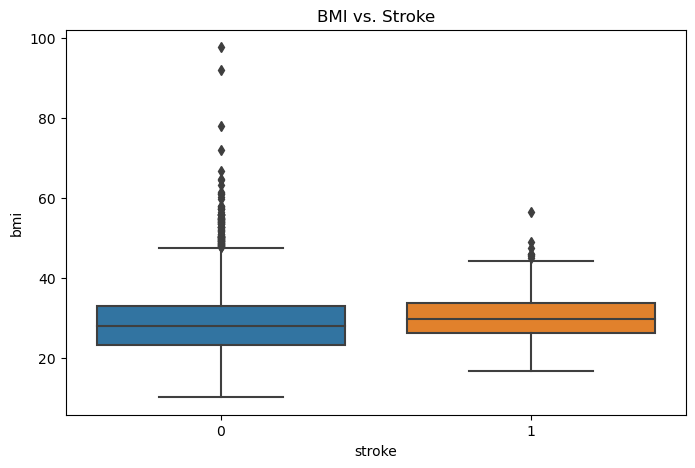

In [61]:
# Relationship between BMI and stroke
plt.figure(figsize=(8, 5))
sns.boxplot(x='stroke', y='bmi', data=data)
plt.title('BMI vs. Stroke')
plt.show()

# Multivariate Analysis

In [88]:
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


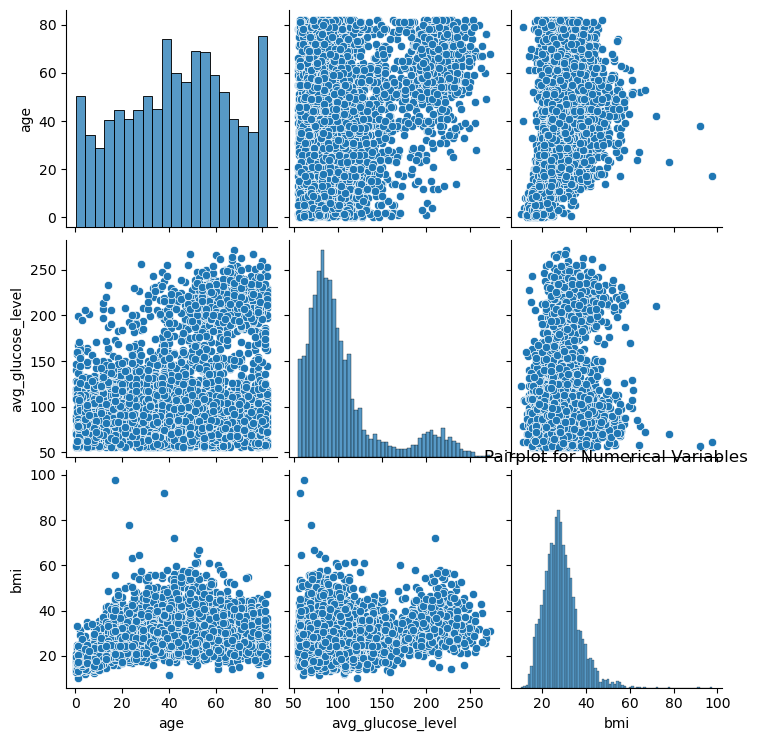

In [90]:
# Pairplot for numerical variables
sns.pairplot(data[numerical_columns])
plt.title('Pairplot for Numerical Variables')
plt.show()

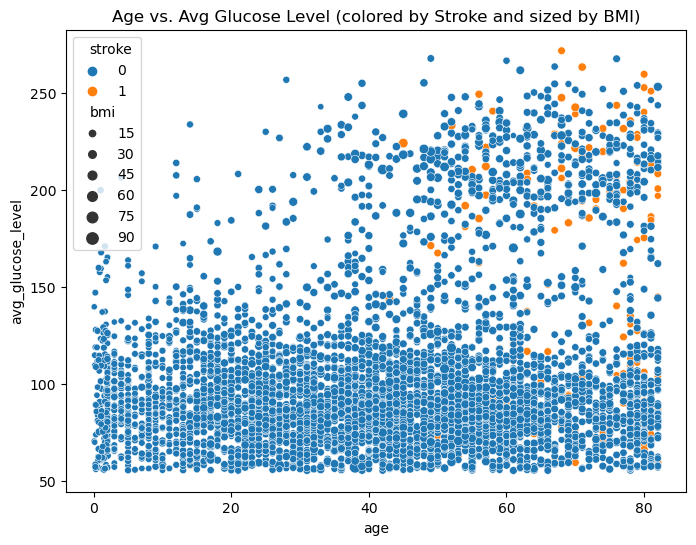

In [92]:
# Scatter plot between age, avg_glucose_level, and bmi
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='avg_glucose_level', hue='stroke', size='bmi', data=data)
plt.title('Age vs. Avg Glucose Level (colored by Stroke and sized by BMI)')
plt.show()

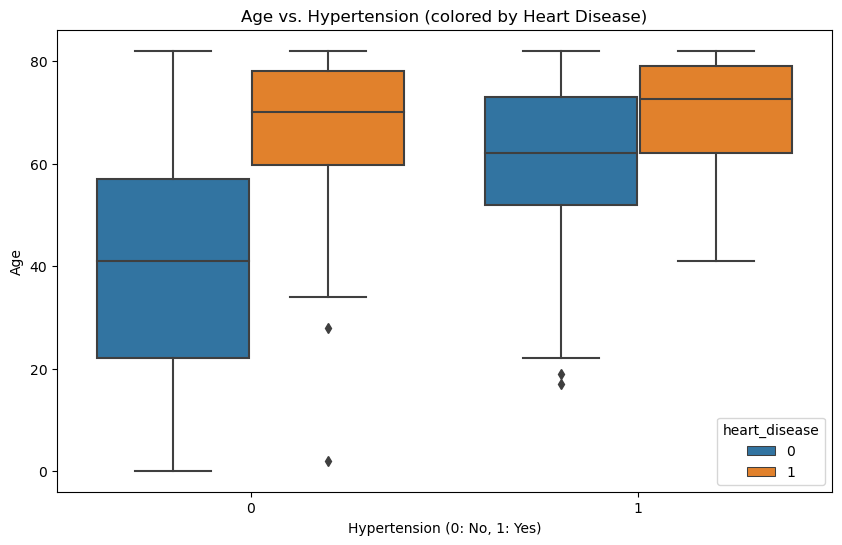

In [36]:
# Box plot of age and avg_glucose_level for different hypertension and heart_disease categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='hypertension', y='age', hue='heart_disease', data=data)
plt.xlabel('Hypertension (0: No, 1: Yes)')
plt.ylabel('Age')
plt.title('Age vs. Hypertension (colored by Heart Disease)')
plt.show()

In [38]:
# Calculate Q1 and all quartiles for 'age' among individuals with hypertension and heart disease
q1_hypertension_heart_disease = data[(data['hypertension'] == 1) & (data['heart_disease'] == 1)]['age'].quantile(0.25)
median_hypertension_heart_disease = data[(data['hypertension'] == 1) & (data['heart_disease'] == 1)]['age'].quantile(0.50)
q3_hypertension_heart_disease = data[(data['hypertension'] == 1) & (data['heart_disease'] == 1)]['age'].quantile(0.75)

# Calculate Q1 and all quartiles for 'age' among individuals with hypertension and without heart disease
q1_hypertension_no_heart_disease = data[(data['hypertension'] == 1) & (data['heart_disease'] == 0)]['age'].quantile(0.25)
median_hypertension_no_heart_disease = data[(data['hypertension'] == 1) & (data['heart_disease'] == 0)]['age'].quantile(0.50)
q3_hypertension_no_heart_disease = data[(data['hypertension'] == 1) & (data['heart_disease'] == 0)]['age'].quantile(0.75)

# Calculate Q1 and all quartiles for 'age' among individuals without hypertension and with heart disease
q1_no_hypertension_heart_disease = data[(data['hypertension'] == 0) & (data['heart_disease'] == 1)]['age'].quantile(0.25)
median_no_hypertension_heart_disease = data[(data['hypertension'] == 0) & (data['heart_disease'] == 1)]['age'].quantile(0.50)
q3_no_hypertension_heart_disease = data[(data['hypertension'] == 0) & (data['heart_disease'] == 1)]['age'].quantile(0.75)

# Calculate Q1 and all quartiles for 'age' among individuals without hypertension and without heart disease
q1_no_hypertension_no_heart_disease = data[(data['hypertension'] == 0) & (data['heart_disease'] == 0)]['age'].quantile(0.25)
median_no_hypertension_no_heart_disease = data[(data['hypertension'] == 0) & (data['heart_disease'] == 0)]['age'].quantile(0.50)
q3_no_hypertension_no_heart_disease = data[(data['hypertension'] == 0) & (data['heart_disease'] == 0)]['age'].quantile(0.75)

print("Quartiles for 'age' among individuals with hypertension and heart disease:")
print(f"Q1 (25th percentile): {q1_hypertension_heart_disease:.2f}")
print(f"Median (50th percentile): {median_hypertension_heart_disease:.2f}")
print(f"Q3 (75th percentile): {q3_hypertension_heart_disease:.2f}")
print()

print("Quartiles for 'age' among individuals with hypertension and without heart disease:")
print(f"Q1 (25th percentile): {q1_hypertension_no_heart_disease:.2f}")
print(f"Median (50th percentile): {median_hypertension_no_heart_disease:.2f}")
print(f"Q3 (75th percentile): {q3_hypertension_no_heart_disease:.2f}")
print()

print("Quartiles for 'age' among individuals without hypertension and with heart disease:")
print(f"Q1 (25th percentile): {q1_no_hypertension_heart_disease:.2f}")
print(f"Median (50th percentile): {median_no_hypertension_heart_disease:.2f}")
print(f"Q3 (75th percentile): {q3_no_hypertension_heart_disease:.2f}")
print()

print("Quartiles for 'age' among individuals without hypertension and without heart disease:")
print(f"Q1 (25th percentile): {q1_no_hypertension_no_heart_disease:.2f}")
print(f"Median (50th percentile): {median_no_hypertension_no_heart_disease:.2f}")
print(f"Q3 (75th percentile): {q3_no_hypertension_no_heart_disease:.2f}")


Quartiles for 'age' among individuals with hypertension and heart disease:
Q1 (25th percentile): 62.00
Median (50th percentile): 72.50
Q3 (75th percentile): 79.00

Quartiles for 'age' among individuals with hypertension and without heart disease:
Q1 (25th percentile): 52.00
Median (50th percentile): 62.00
Q3 (75th percentile): 73.00

Quartiles for 'age' among individuals without hypertension and with heart disease:
Q1 (25th percentile): 59.75
Median (50th percentile): 70.00
Q3 (75th percentile): 78.00

Quartiles for 'age' among individuals without hypertension and without heart disease:
Q1 (25th percentile): 22.00
Median (50th percentile): 41.00
Q3 (75th percentile): 57.00


## Inference
-------
For individuals with hypertension and heart disease:

* The first quartile (Q1) value of 62.00 suggests that approximately 25% of individuals with both hypertension and heart disease are aged 62.00 years or below.
* The median (50th percentile) value of 72.50 indicates that half of the individuals with both hypertension and heart disease fall below the age of 72.50 years.
* The third quartile (Q3) value of 79.00 implies that about 75% of individuals with both hypertension and heart disease are aged 79.00 years or below.

For individuals with hypertension but without heart disease:

* The first quartile (Q1) value of 52.00 suggests that approximately 25% of individuals with hypertension but without heart disease are aged 52.00 years or below.
* The median (50th percentile) value of 62.00 indicates that half of the individuals with hypertension but without heart disease are below the age of 62.00 years.
* The third quartile (Q3) value of 73.00 implies that about 75% of individuals with hypertension but without heart disease are aged 73.00 years or below.

For individuals without hypertension but with heart disease:

* The first quartile (Q1) value of 59.75 suggests that approximately 25% of individuals without hypertension but with heart disease are aged 59.75 years or below.
* The median (50th percentile) value of 70.00 indicates that half of the individuals without hypertension but with heart disease are below the age of 70.00 years.
* The third quartile (Q3) value of 78.00 implies that about 75% of individuals without hypertension but with heart disease are aged 78.00 years or below.

For individuals without both hypertension and heart disease:

* The first quartile (Q1) value of 22.00 suggests that approximately 25% of individuals without both hypertension and heart disease are aged 22.00 years or below.
* The median (50th percentile) value of 41.00 indicates that half of the individuals without both hypertension and heart disease are below the age of 41.00 years.
* The third quartile (Q3) value of 57.00 implies that about 75% of individuals without both hypertension and heart disease are aged 57.00 years or below.

In summary, from the observation above we can demonstrate variations in age distribution based on different combinations of hypertension and heart disease among individuals in the dataset. For instance, individuals with both hypertension and heart disease tend to be older, with higher median and quartile values compared to other groups. Conversely, individuals without both hypertension and heart disease have lower median and quartile values, indicating a relatively younger age group. These insights can be crucial for understanding the relationship between age, hypertension, and heart disease, potentially aiding in identifying risk factors and implementing appropriate preventive strategies and treatments.

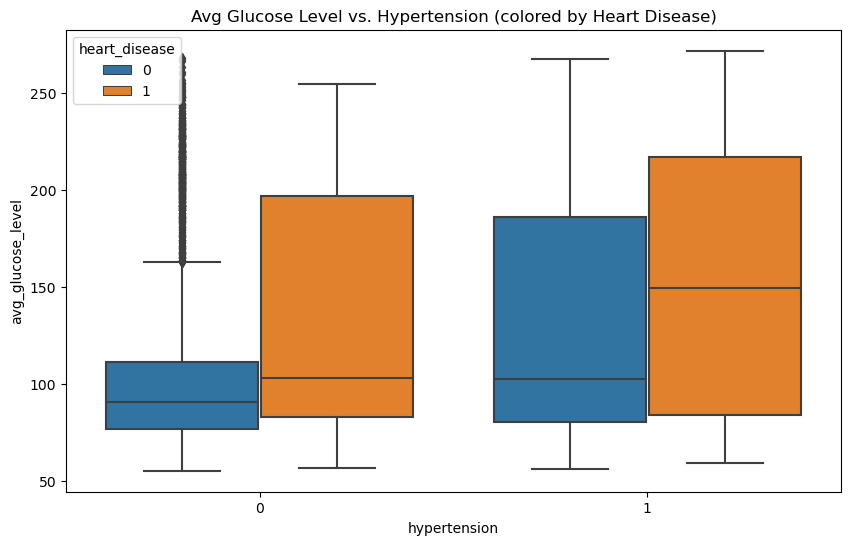

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='hypertension', y='avg_glucose_level', hue='heart_disease', data=data)
plt.title('Avg Glucose Level vs. Hypertension (colored by Heart Disease)')
plt.show()

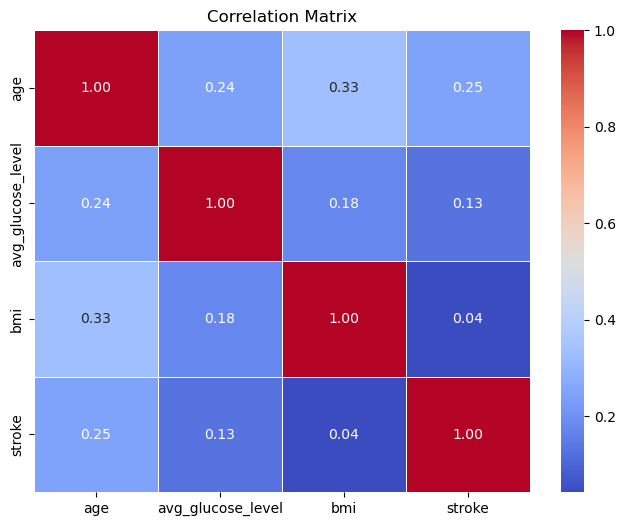

In [42]:
correlation_matrix = data[numerical_columns + ['stroke']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()